# Ejercicio de regresión

Realizar estudios  de aprendizaje utilizando random forests. El enunciado del ejercicio es el siguiente:

**Enunciado:** https://www.kaggle.com/marklvl/bike-sharing-dataset. Predicción de números de bicicletas alquiladas por cada hora. El dataset contiene una serie de datos como temperatura, humedad, si es día laborable, etc. El objetivo es predecir cuantas bicicletas se van a alquilar dependiendo de esa serie de parámetros.

**_Importación de librerías necesarias_**

In [ ]:
from google.colab import drive
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_val_score, KFold
from sklearn.inspection import PartialDependenceDisplay

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**_Preproceso_**

*Importación de los datos del dataset*

In [ ]:
drive.mount("/content/drive")

df_hour = pd.read_csv("/content/drive/My Drive/IABD/SAA/datasets/Tema 2/hour.csv")
df_day = pd.read_csv("/content/drive/My Drive/IABD/SAA/datasets/Tema 2/day.csv")

Mounted at /content/drive


## Estudio de los atributos del dataframe:

Tipos de datos que tiene el dataset.

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*Mostrar las primera y últimas filas del data frame importado*

In [ ]:
df_hour
# Colab muestra las primeras y últimas filas, si se hace desde un entorno de ejecución diferente que no se jupiter se haría de la siguiente forma:
# df_hour.head()
# df_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Estudio de los atributos del dataframe:

_Tipos de datos que tiene el dataset:_

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


_Mostar las primeras líneas del dataframe_

In [ ]:
df_day
# Colab muestra las primeras y últimas filas, si se hace desde un entorno de ejecución diferente que no se jupiter se haría de la siguiente forma:
# df_day.head()
# df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Fusiono ambos datasets mediante la fecha.

In [ ]:
df_bike = df_hour.merge(df_day, on="dteday", suffixes=("_hour", "_day"))

Muestro las primeras líneas del nuevo dataframe.

In [ ]:
df_bike
# Colab muestra las primeras y últimas filas, si se hace desde un entorno de ejecución diferente que no se jupiter se haría de la siguiente forma:
# df_bike.head()
# df_bike.tail()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


*Mostar parámetros estadísticos de los datos (media, desviación típica, quartiles, etc.).*

In [ ]:
df_bike.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


*Mostrar un mapa de calor que indique la correlación entre variables*

<Axes: >

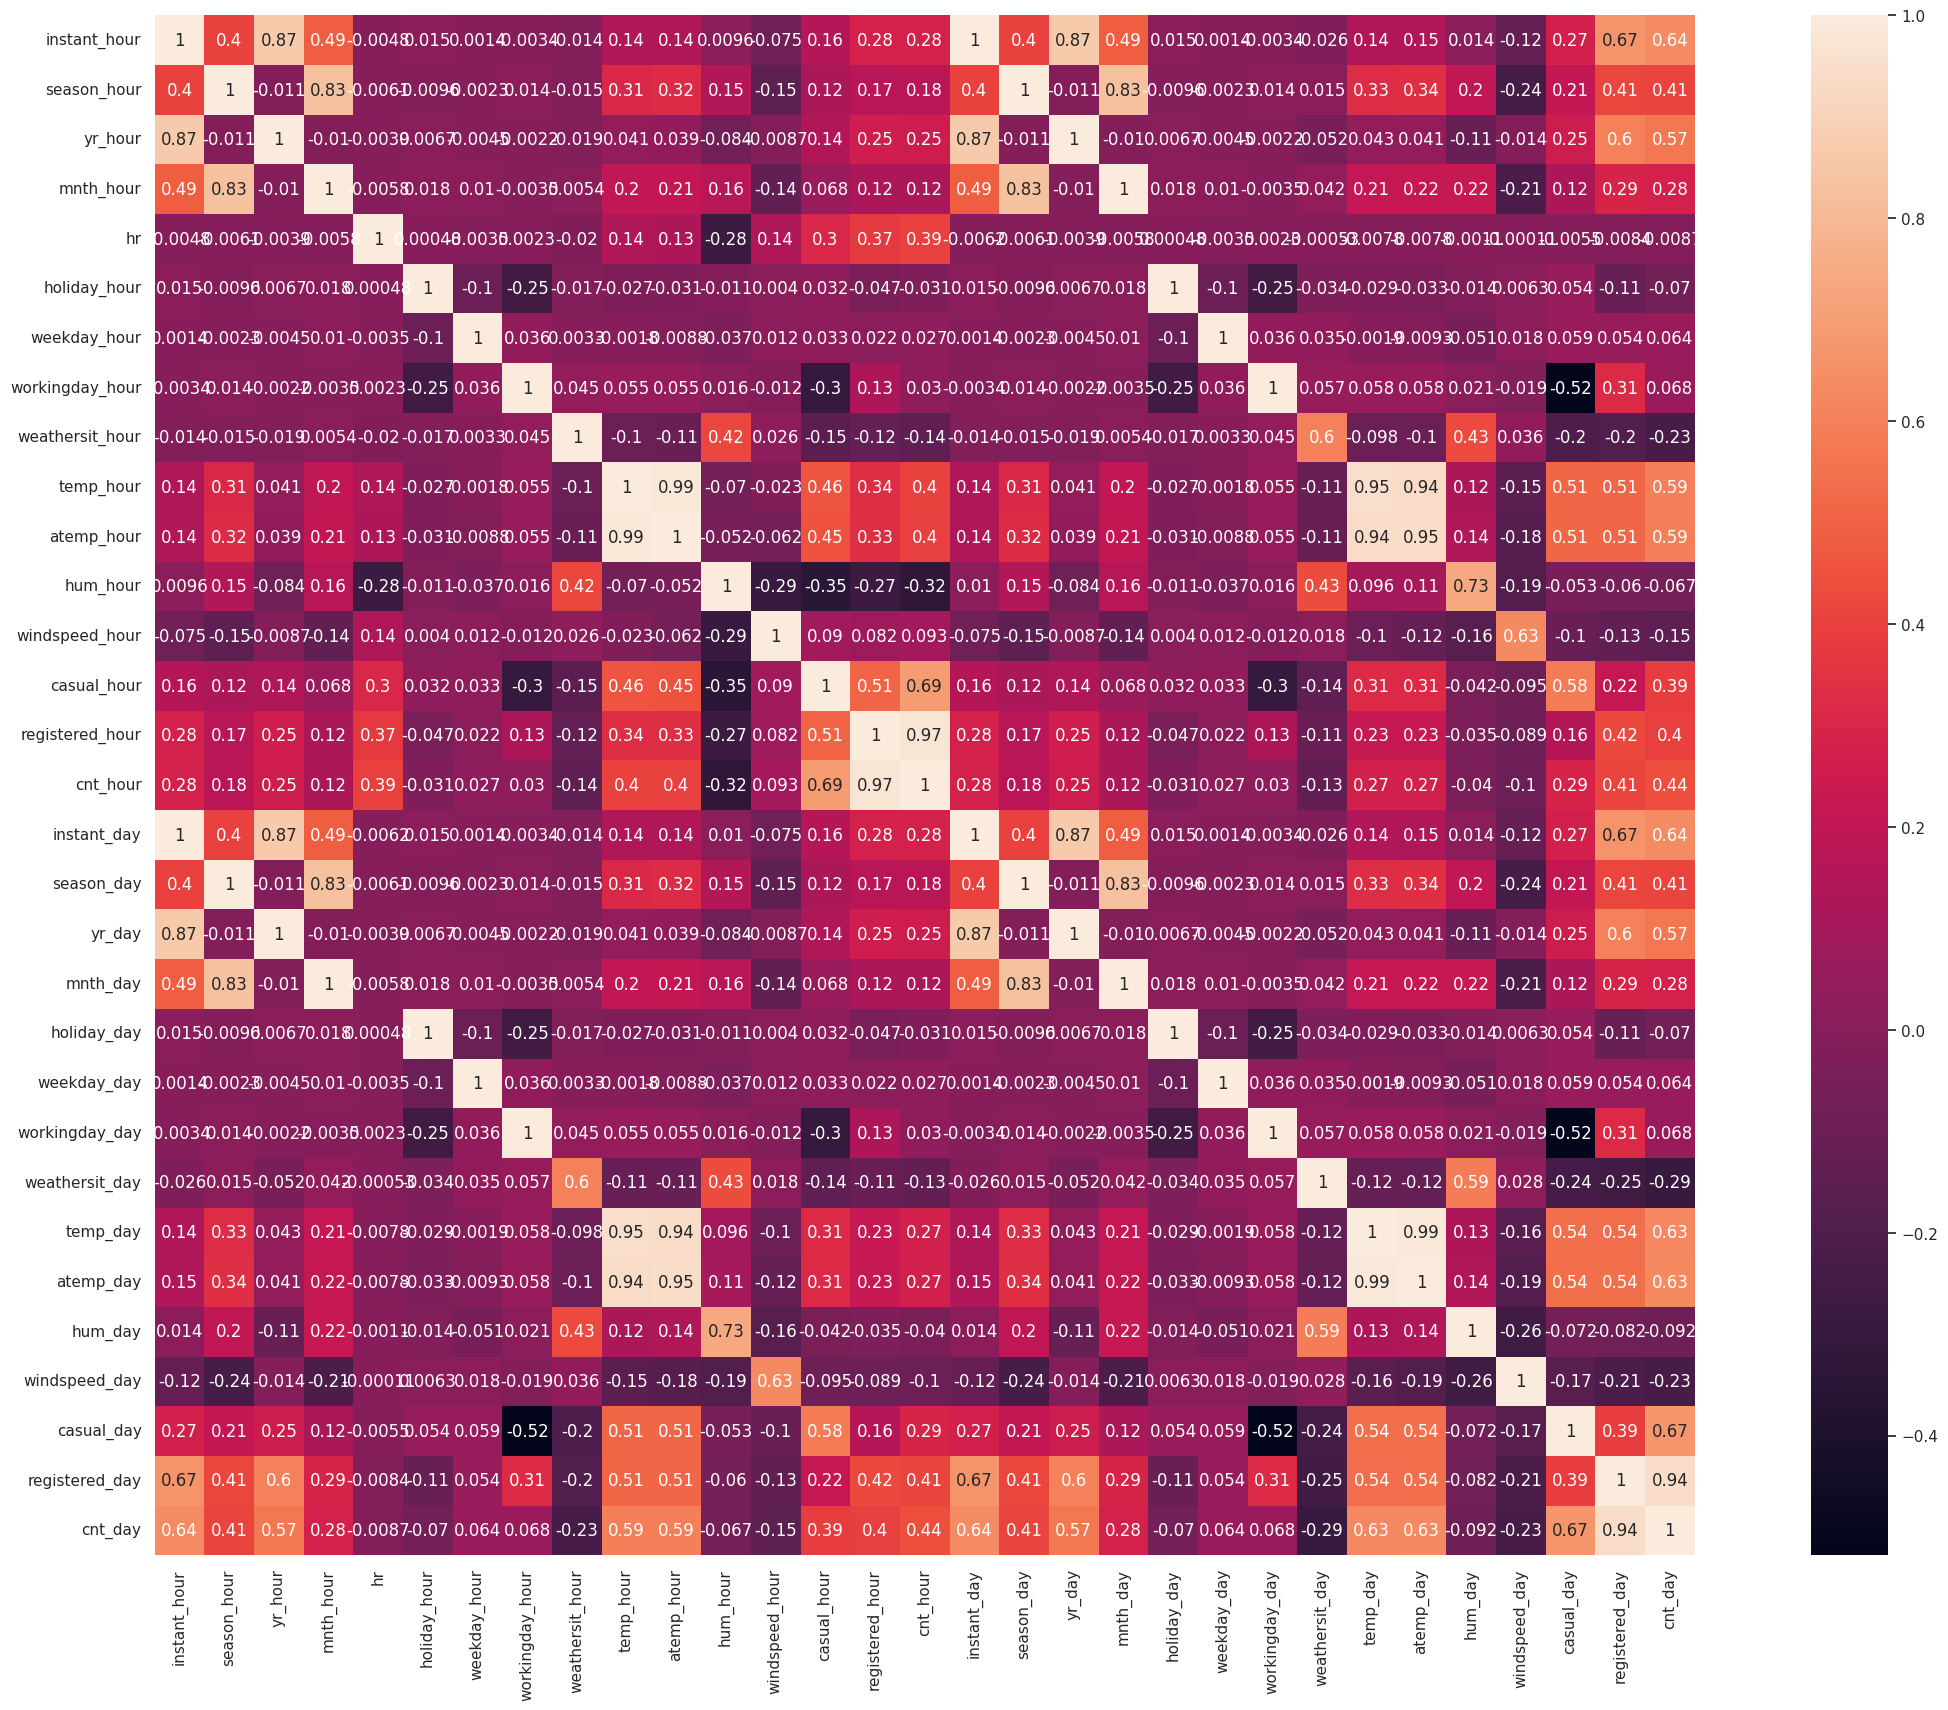

In [ ]:
sns.set(rc={"figure.figsize": (30, 20)})
sns.heatmap(df_bike.drop("dteday", axis=1).corr(), square = True, annot = True)

Como se puede observar en el ejemplo anterior del mapa de calor, existen demasiados atributos. Para ello voy a filtrar las relaciones que tengan más de un 0.5.

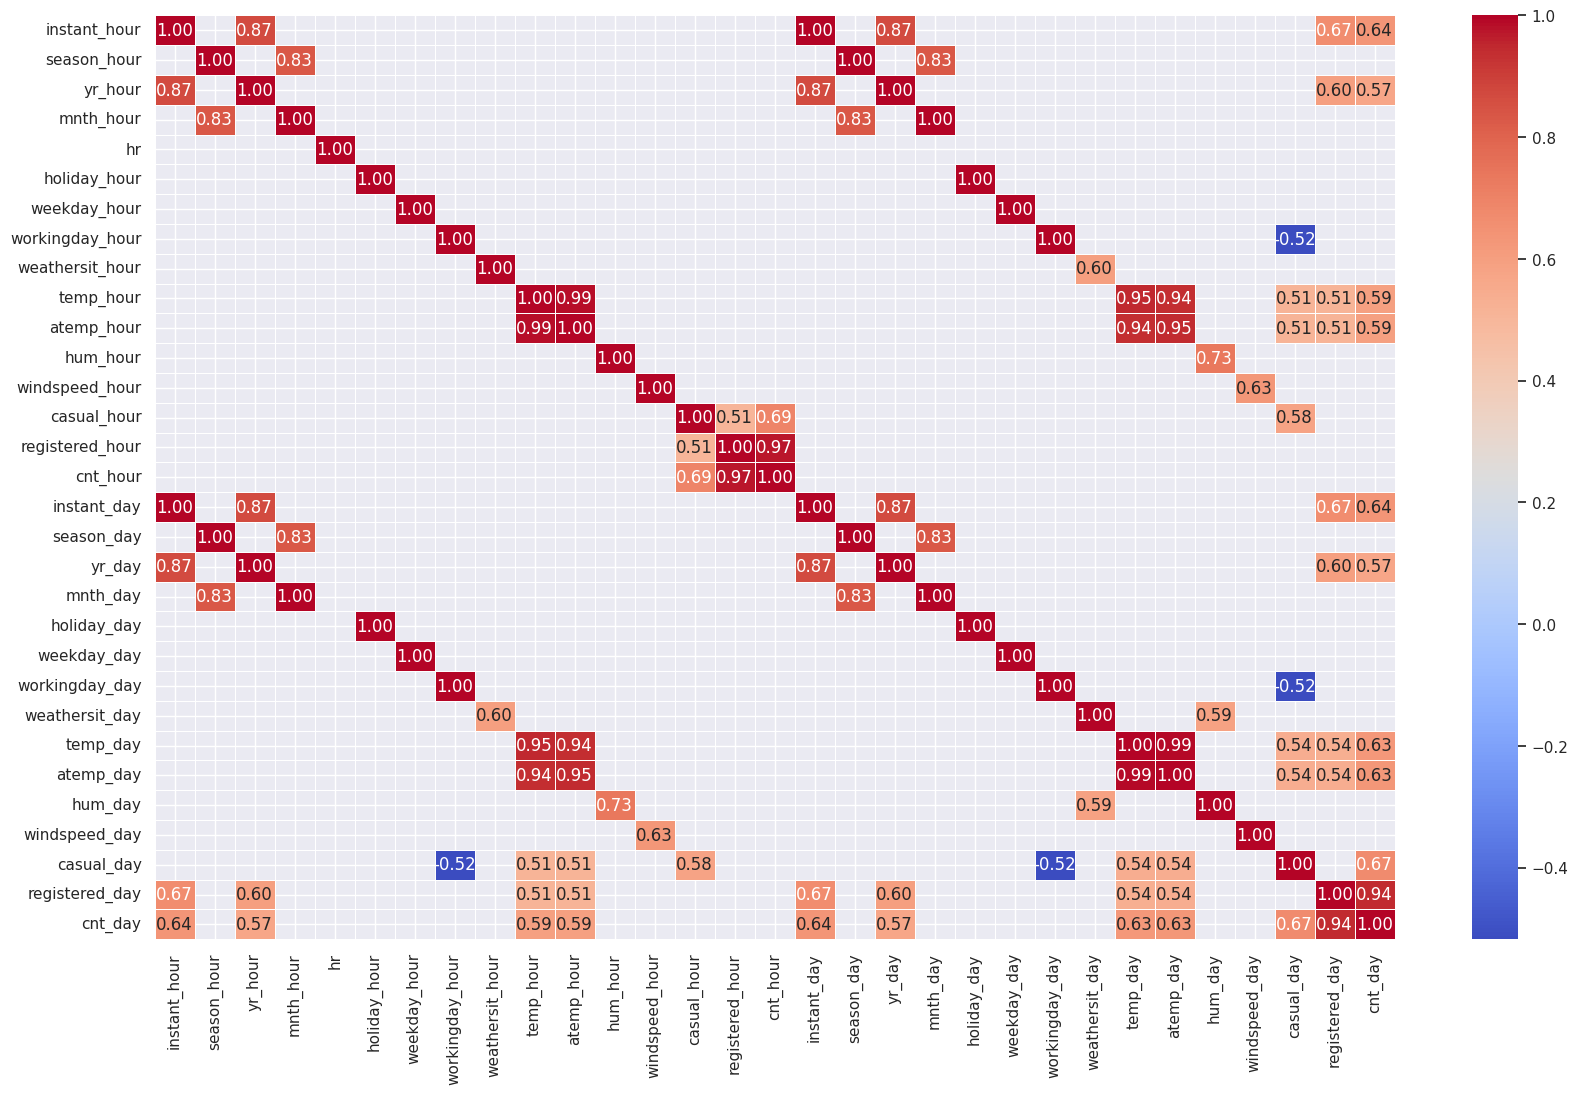

In [ ]:
filtered_corr = df_bike.drop("dteday", axis=1).corr()
filtered_corr[abs(filtered_corr) < 0.5] = np.nan
plt.figure(figsize=(20, 12))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.isnan(filtered_corr))
plt.show()

## Tranformación de los atributos:

Si nos fijamos en los los tipos de datos que tiene el dataset (se han mostrado más arriba) el unico atributo que es de tipo objeto es el dteday pero al fusionar ambos datasets ha desaparecido. Esto quiere decir que no existen atributos categóricos. Así nos saltamos el tener que transormarlas por el método One-Hot. Lo que si debemos hacer es transformar o eliminar (en este caso transformar) los outliers y el escalado de los atributos.

In [ ]:
def detectarLimitesOutlier(df: pd.DataFrame, k: int = 3):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  xL = Q1 - k * IQR # Límite inferior
  xU = Q3 + k * IQR # Límite Superior
  return (xL, xU)

def outliersCambiarMedia(df: pd.DataFrame, k = 3) -> pd.DataFrame:
    df_numeric = df.select_dtypes(include=[np.number])

    xL, xU = detectarLimitesOutlier(df_numeric, k)

    outliers = (df_numeric < xL) | (df_numeric > xU)

    df_sin_outliers = df.copy()

    for columna in df_numeric.columns:
        media = df_numeric[columna].mean()
        if df_sin_outliers[columna].dtype == 'int64':
          df_sin_outliers.loc[outliers[columna], columna] = int(media)
        else:
          df_sin_outliers.loc[outliers[columna], columna] = media

    return df_sin_outliers

In [ ]:
df_norm = outliersCambiarMedia(df_bike)
df_norm

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Como ya sabemos que todos los atributos son de tipo numérico excepto dteday, continuamos con el escalado de estas.

In [ ]:
scaler = preprocessing.MinMaxScaler()
df_norm[df_norm.drop("dteday", axis=1).columns] = scaler.fit_transform(df_norm.drop("dteday", axis=1))

*Separo las características que nos interesa de la objetivo*

In [ ]:
x_df_bike = df_norm[["registered_day", "casual_day", "atemp_day", "temp_day", "yr_day", "instant_day", "atemp_hour", "temp_hour", "yr_hour", "instant_hour"]]

y_df_bike = df_norm['cnt_day']

*Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% test)*

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x_df_bike, y_df_bike, random_state=1, test_size=0.2)

**_Entrenamiento y predicción_**

_Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar modelo_

In [ ]:
modelo = RandomForestRegressor(n_estimators=100, random_state=1)
modelo.fit(x_entrenamiento, y_entrenamiento)

RandomForestRegressor(random_state=1)

*Realizar una predicción con los datos de prueba*

In [ ]:
y_prediccion = modelo.predict(x_test)

**_Evaluación_**

*Mostrar el error cuadrático medio (mean_squared_error)*

In [ ]:
print("El error cuadrático medio:", mean_squared_error(y_test, y_prediccion))

El error cuadrático medio: 1.325345699001311e-08


*Mostrar el error absoluto medio (mean_absolute_error)*

In [ ]:
print("El error absoluto medio:", mean_absolute_error(y_test, y_prediccion))

El error absoluto medio: 1.1655096522003646e-05


*Representar gráficamente los valores predichos con los valores reales.*

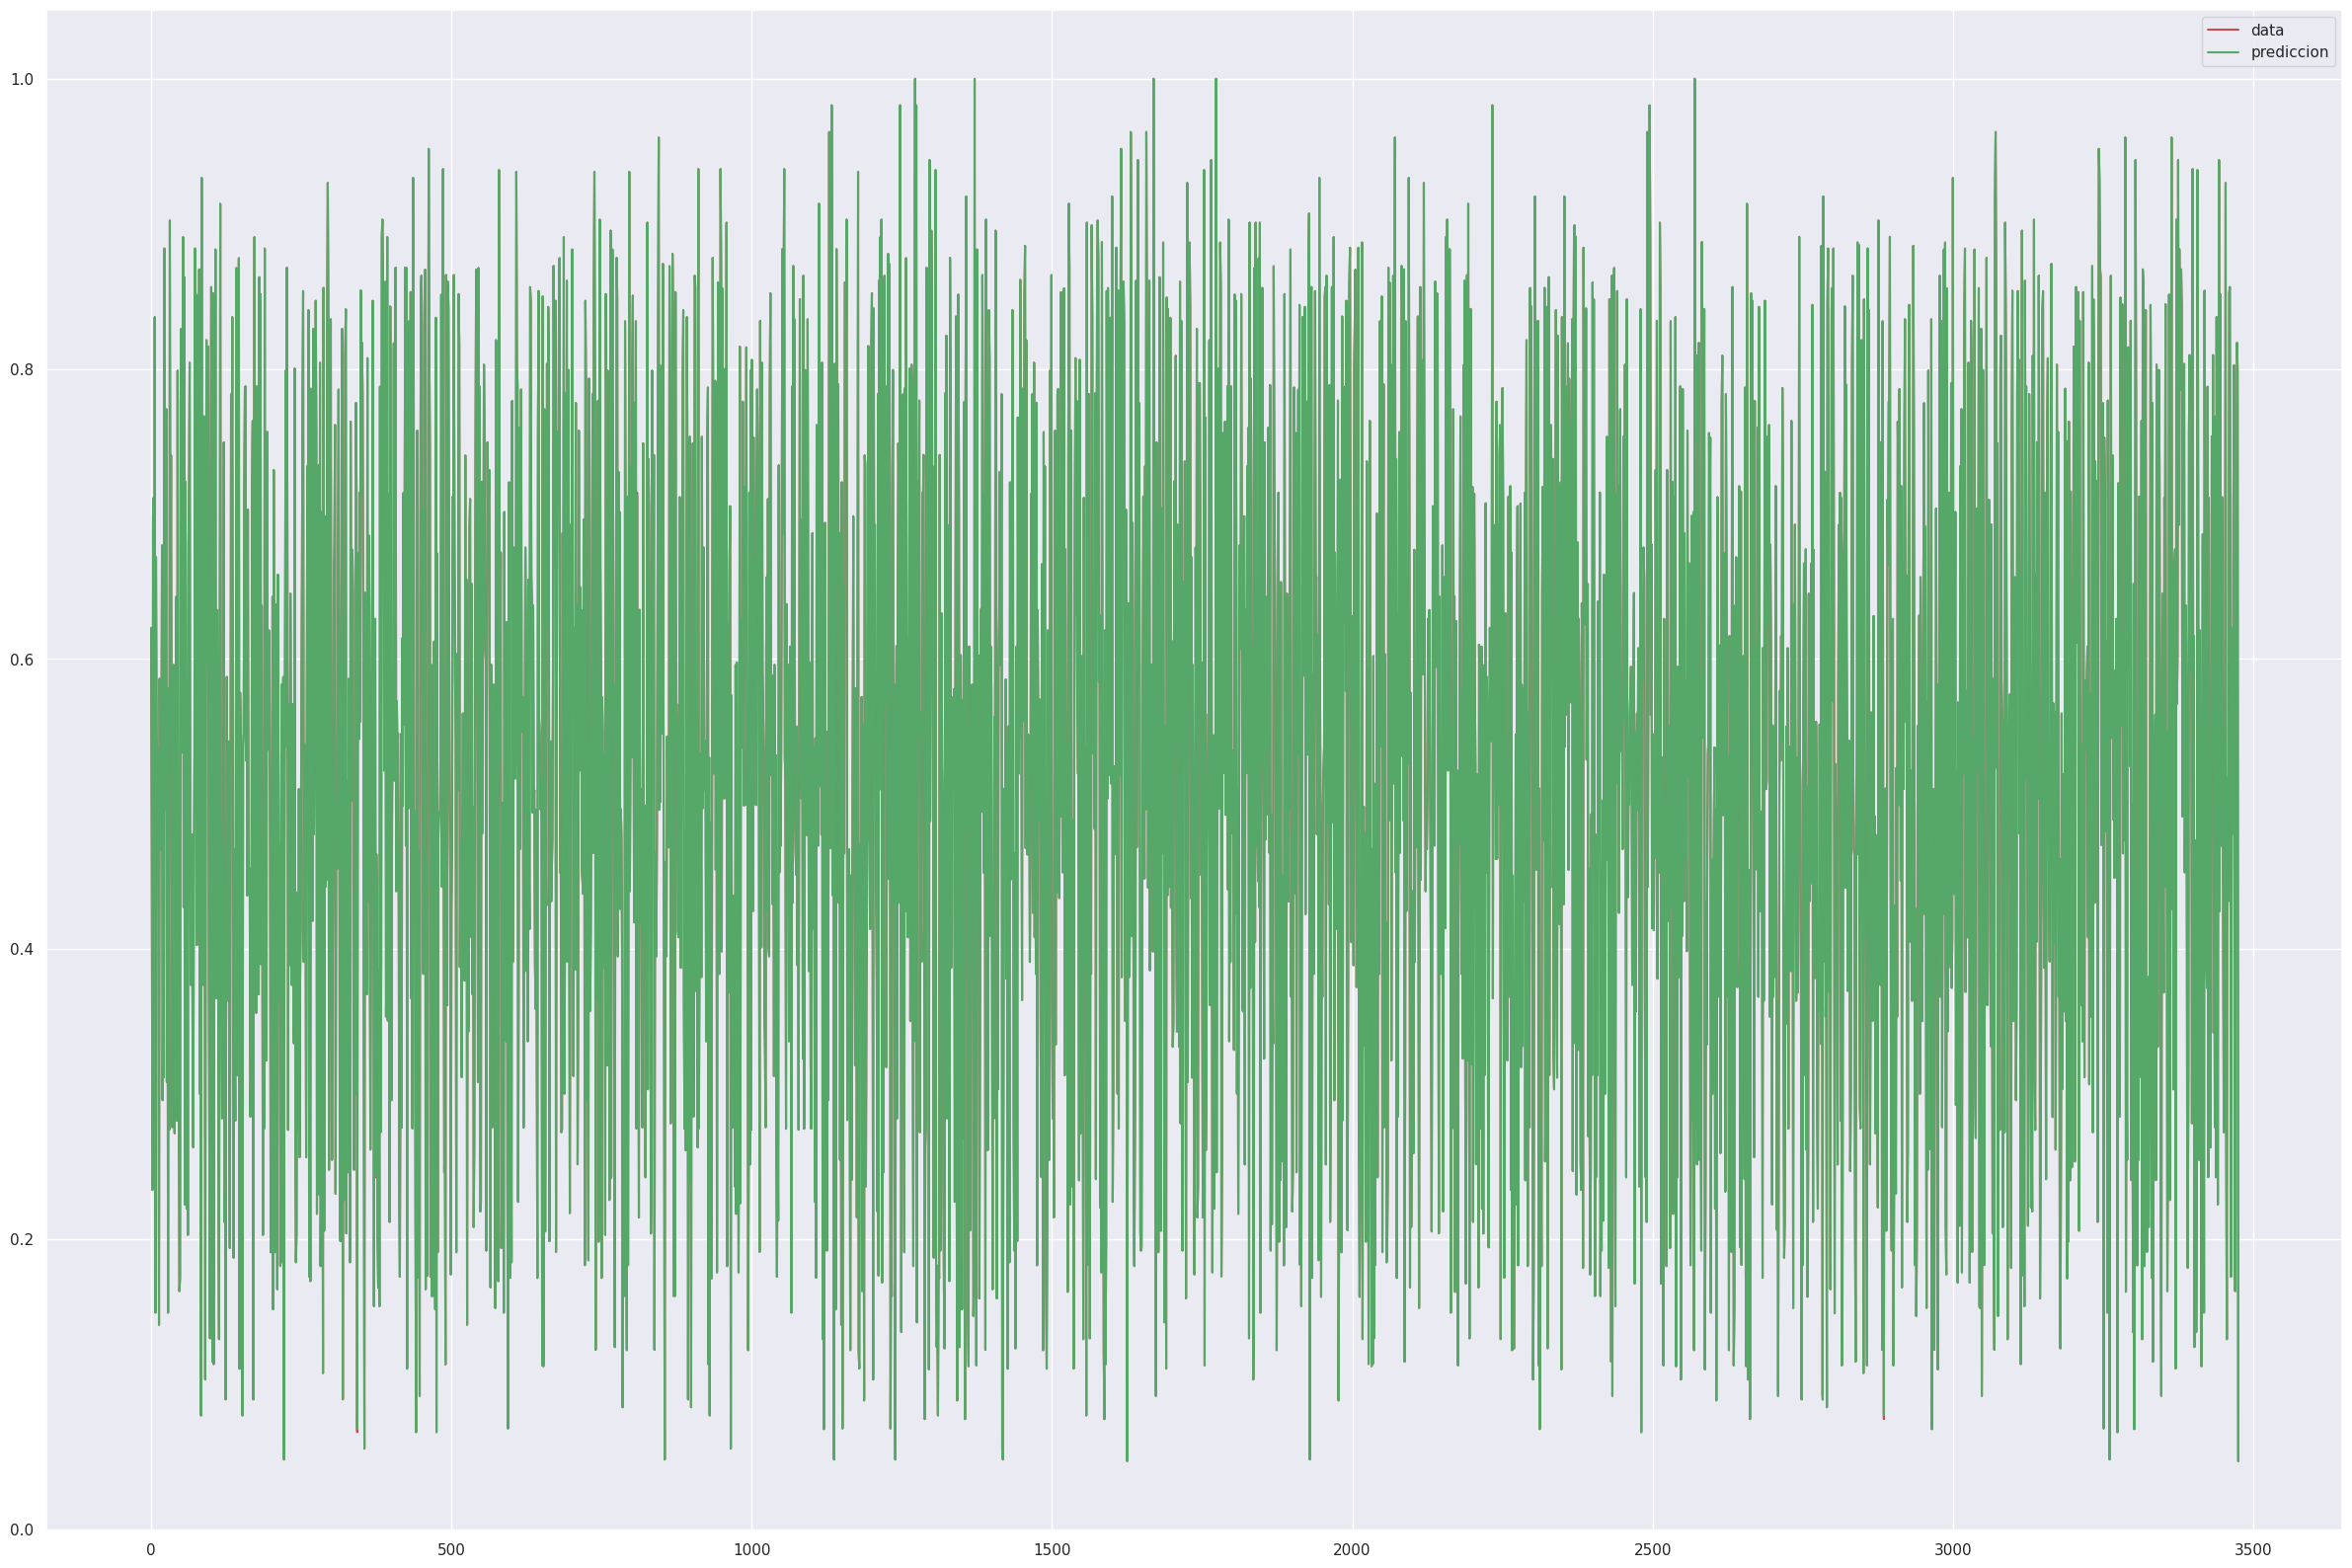

In [ ]:
xx = np.stack([i for i in range(y_test.shape[0])])
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_prediccion, c='g', label='prediccion')
plt.axis('tight')
plt.legend()
plt.show()

_Distribución del Error (Histograma de residuales)_

Muestra la distribución de los errores de predicción. Para un buen modelo, los residuales deberían estar normalmente distribuidos alrededor del cero.

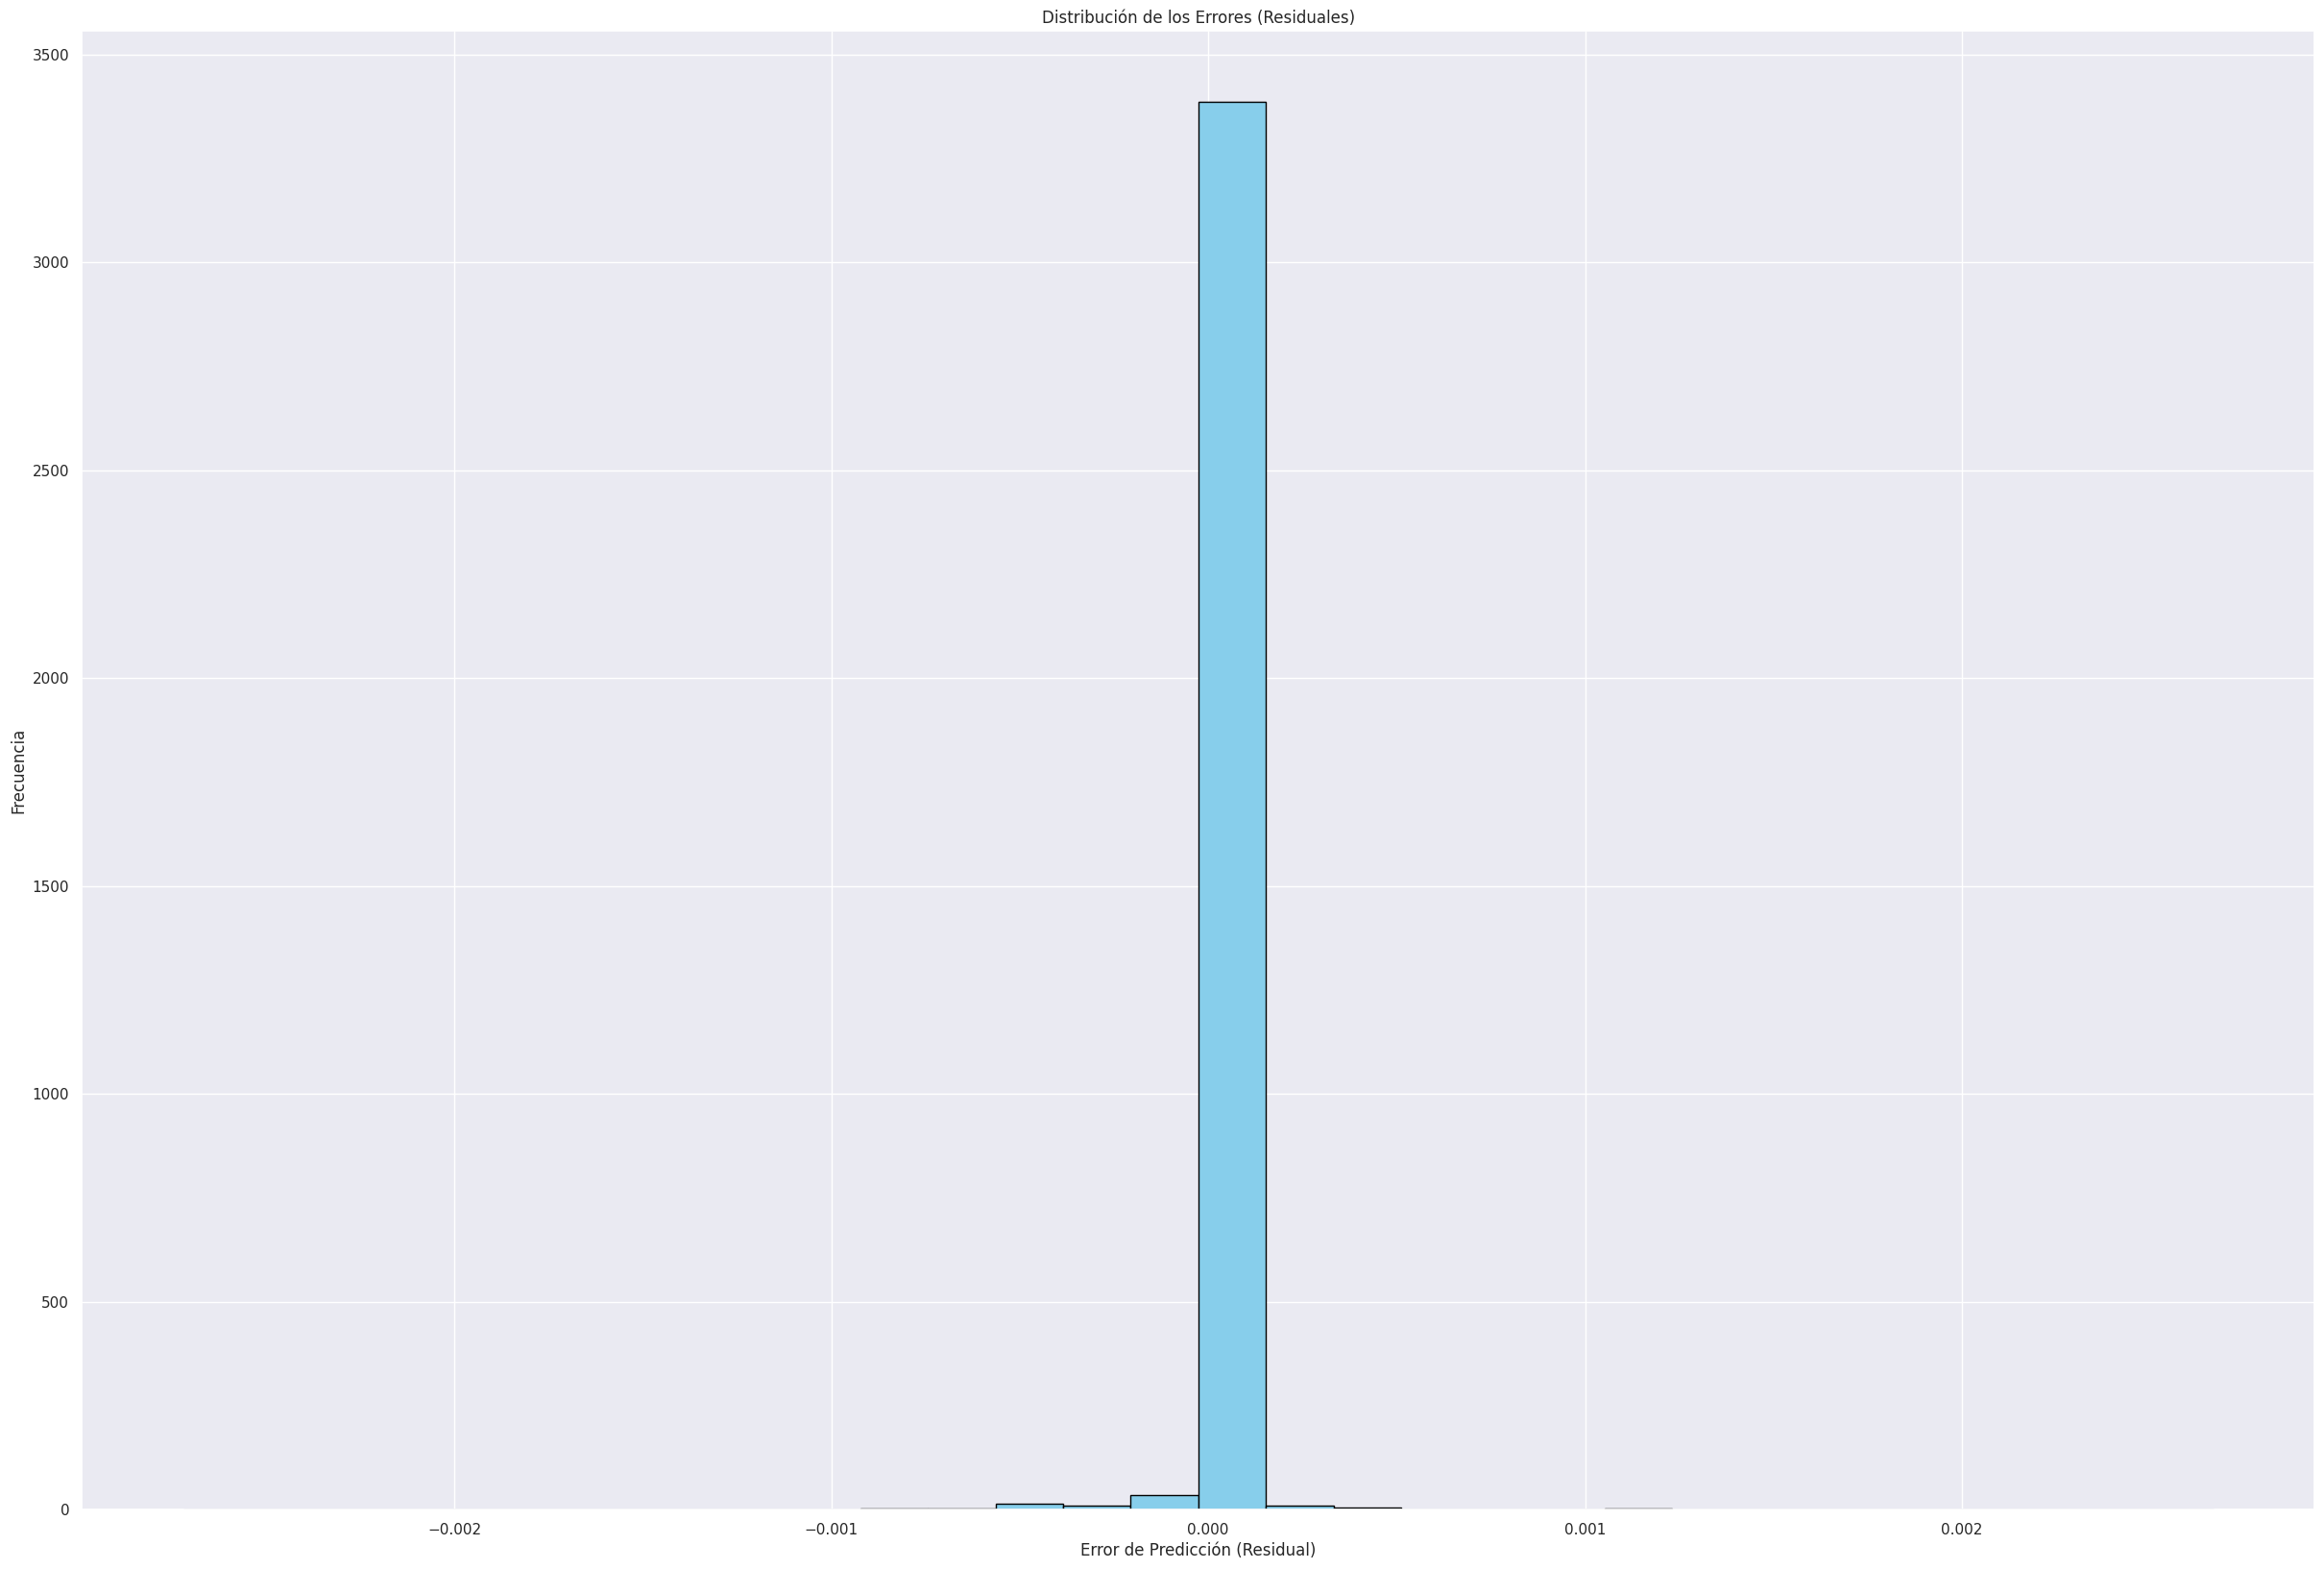

In [ ]:
residuales = y_test - y_prediccion

plt.hist(residuales, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Error de Predicción (Residual)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores (Residuales)")
plt.show()

_Curva de Predicciones acumuladas (PDP)_

Muestra cómo cambia la predicción promedio cuando una caracterísica varía, manteniendo las demás constantes. Es útil para interpretar el impacto de una característica en el modelo.

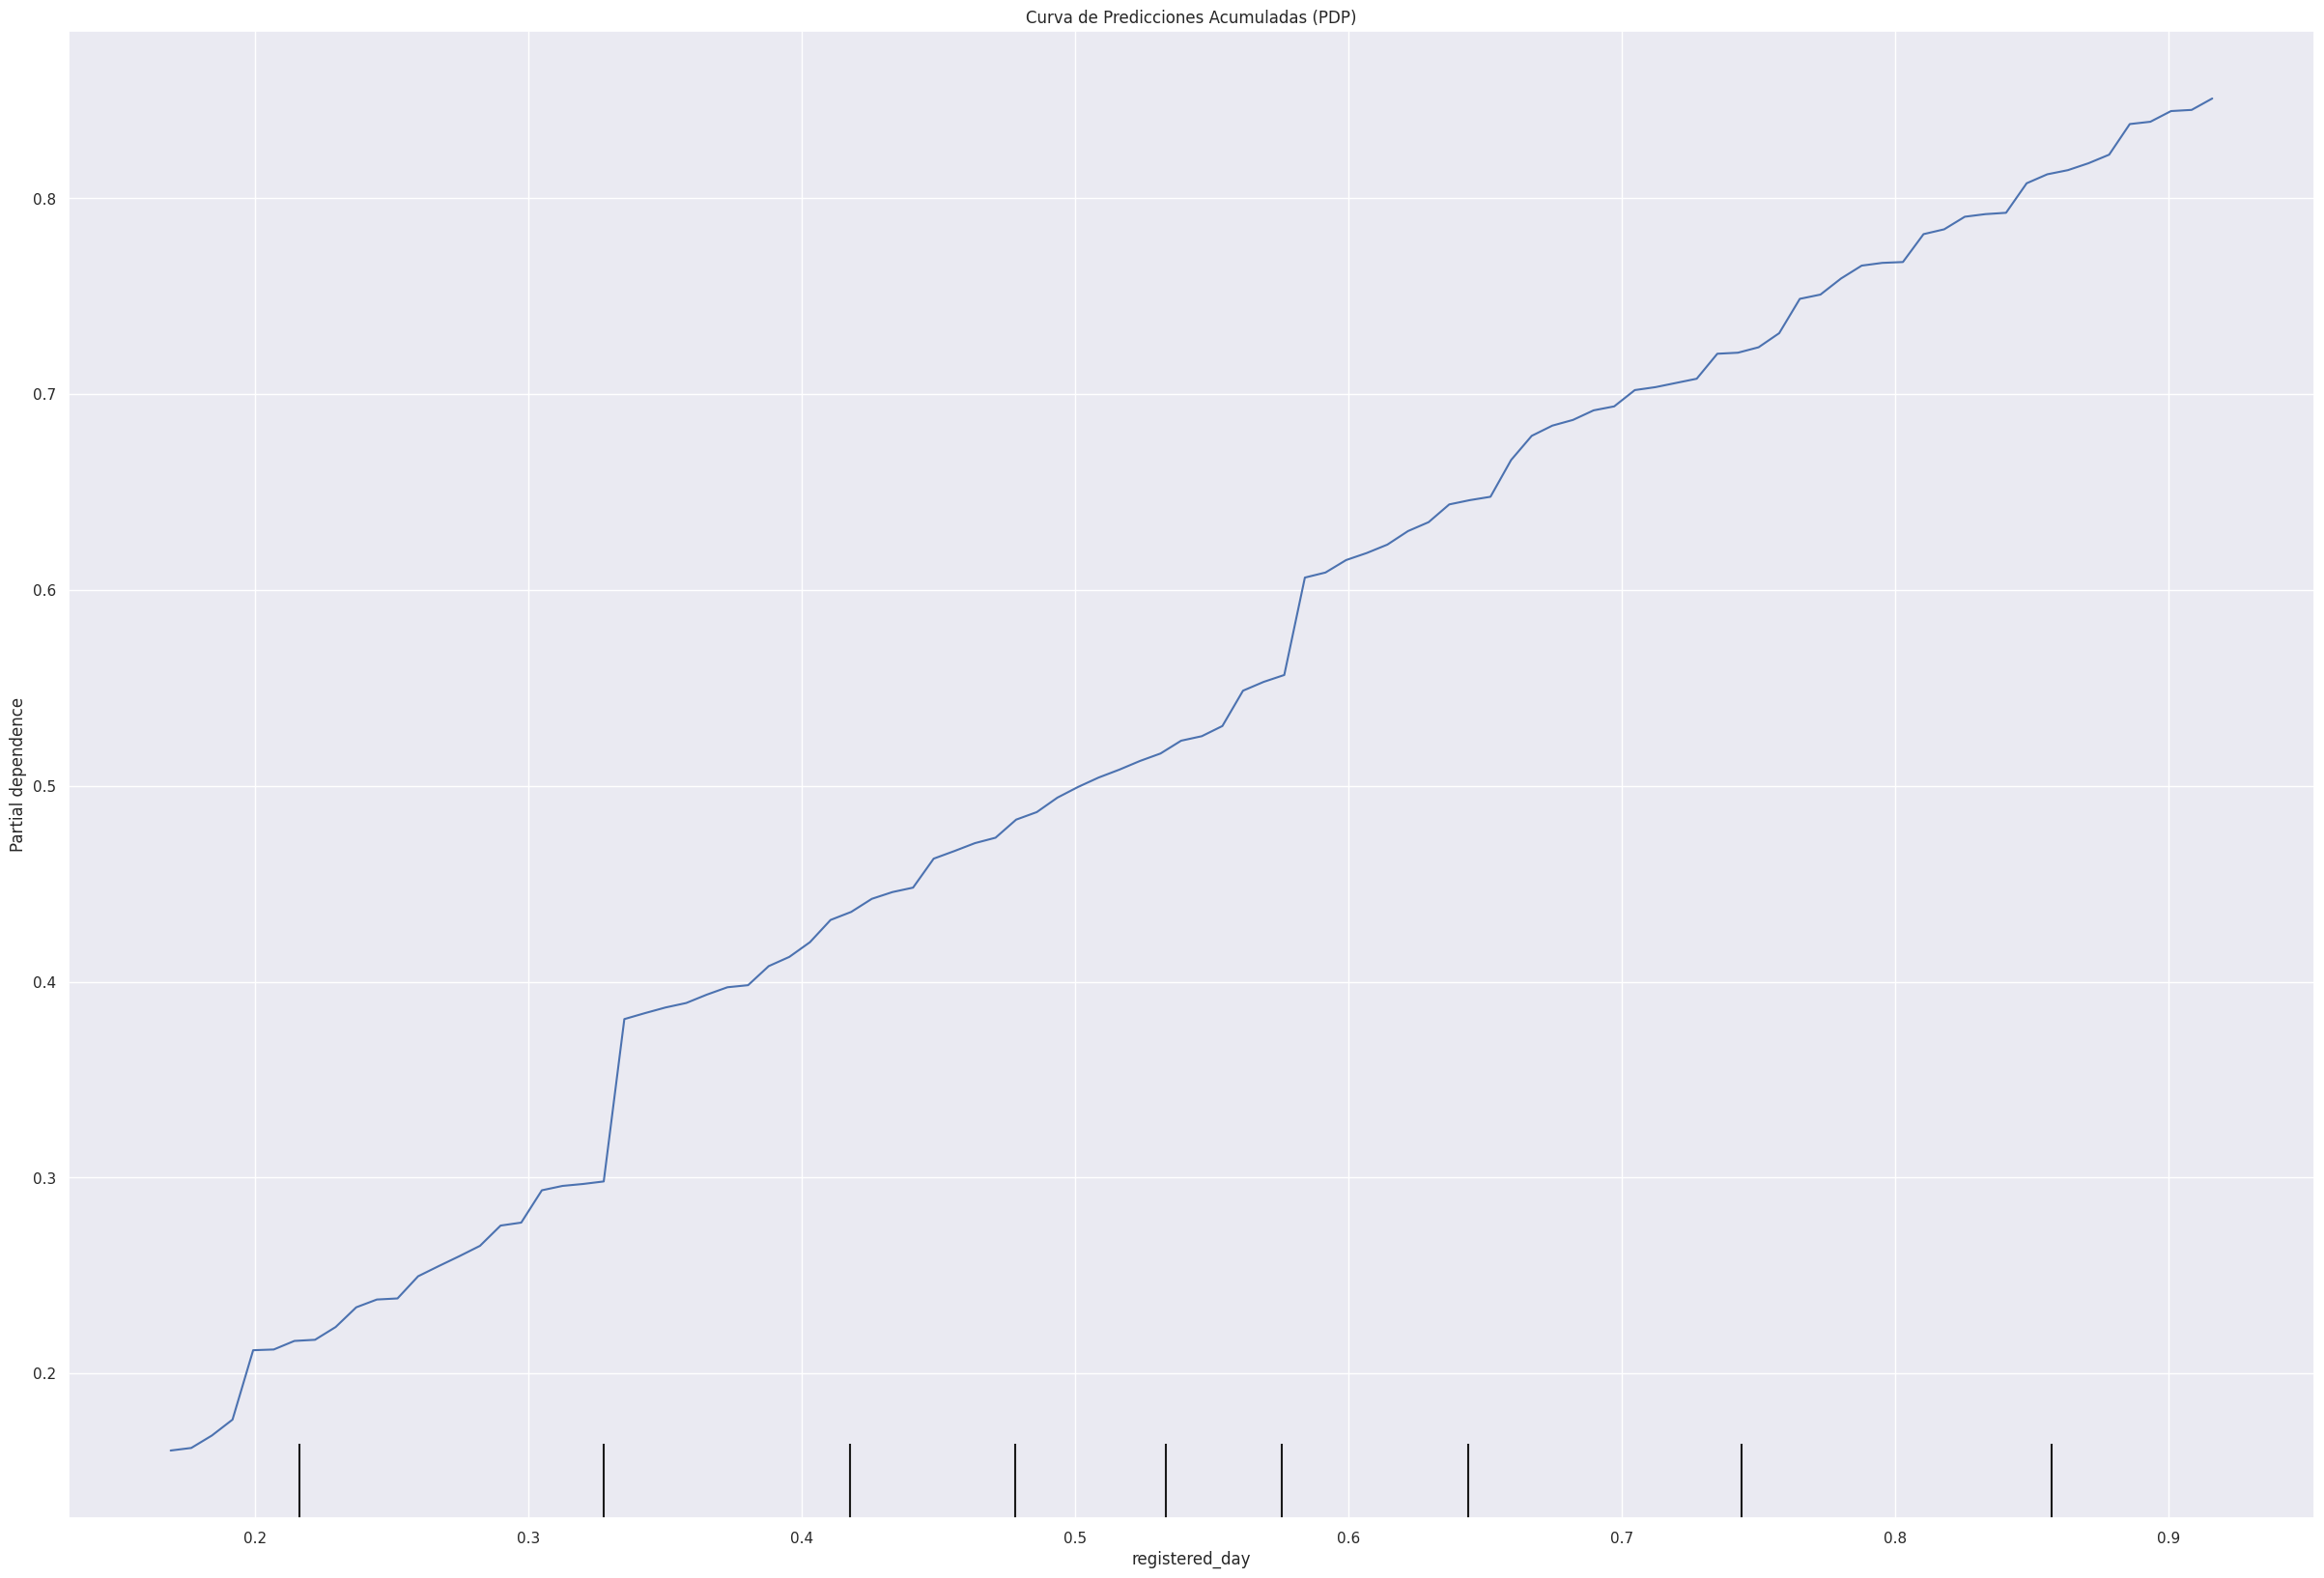

In [ ]:
# PDP para una característica en particular (ejemplo: primera columna)
PartialDependenceDisplay.from_estimator(modelo, x_test, [0])
plt.title("Curva de Predicciones Acumuladas (PDP)")
plt.show()

_Importancia de las características_

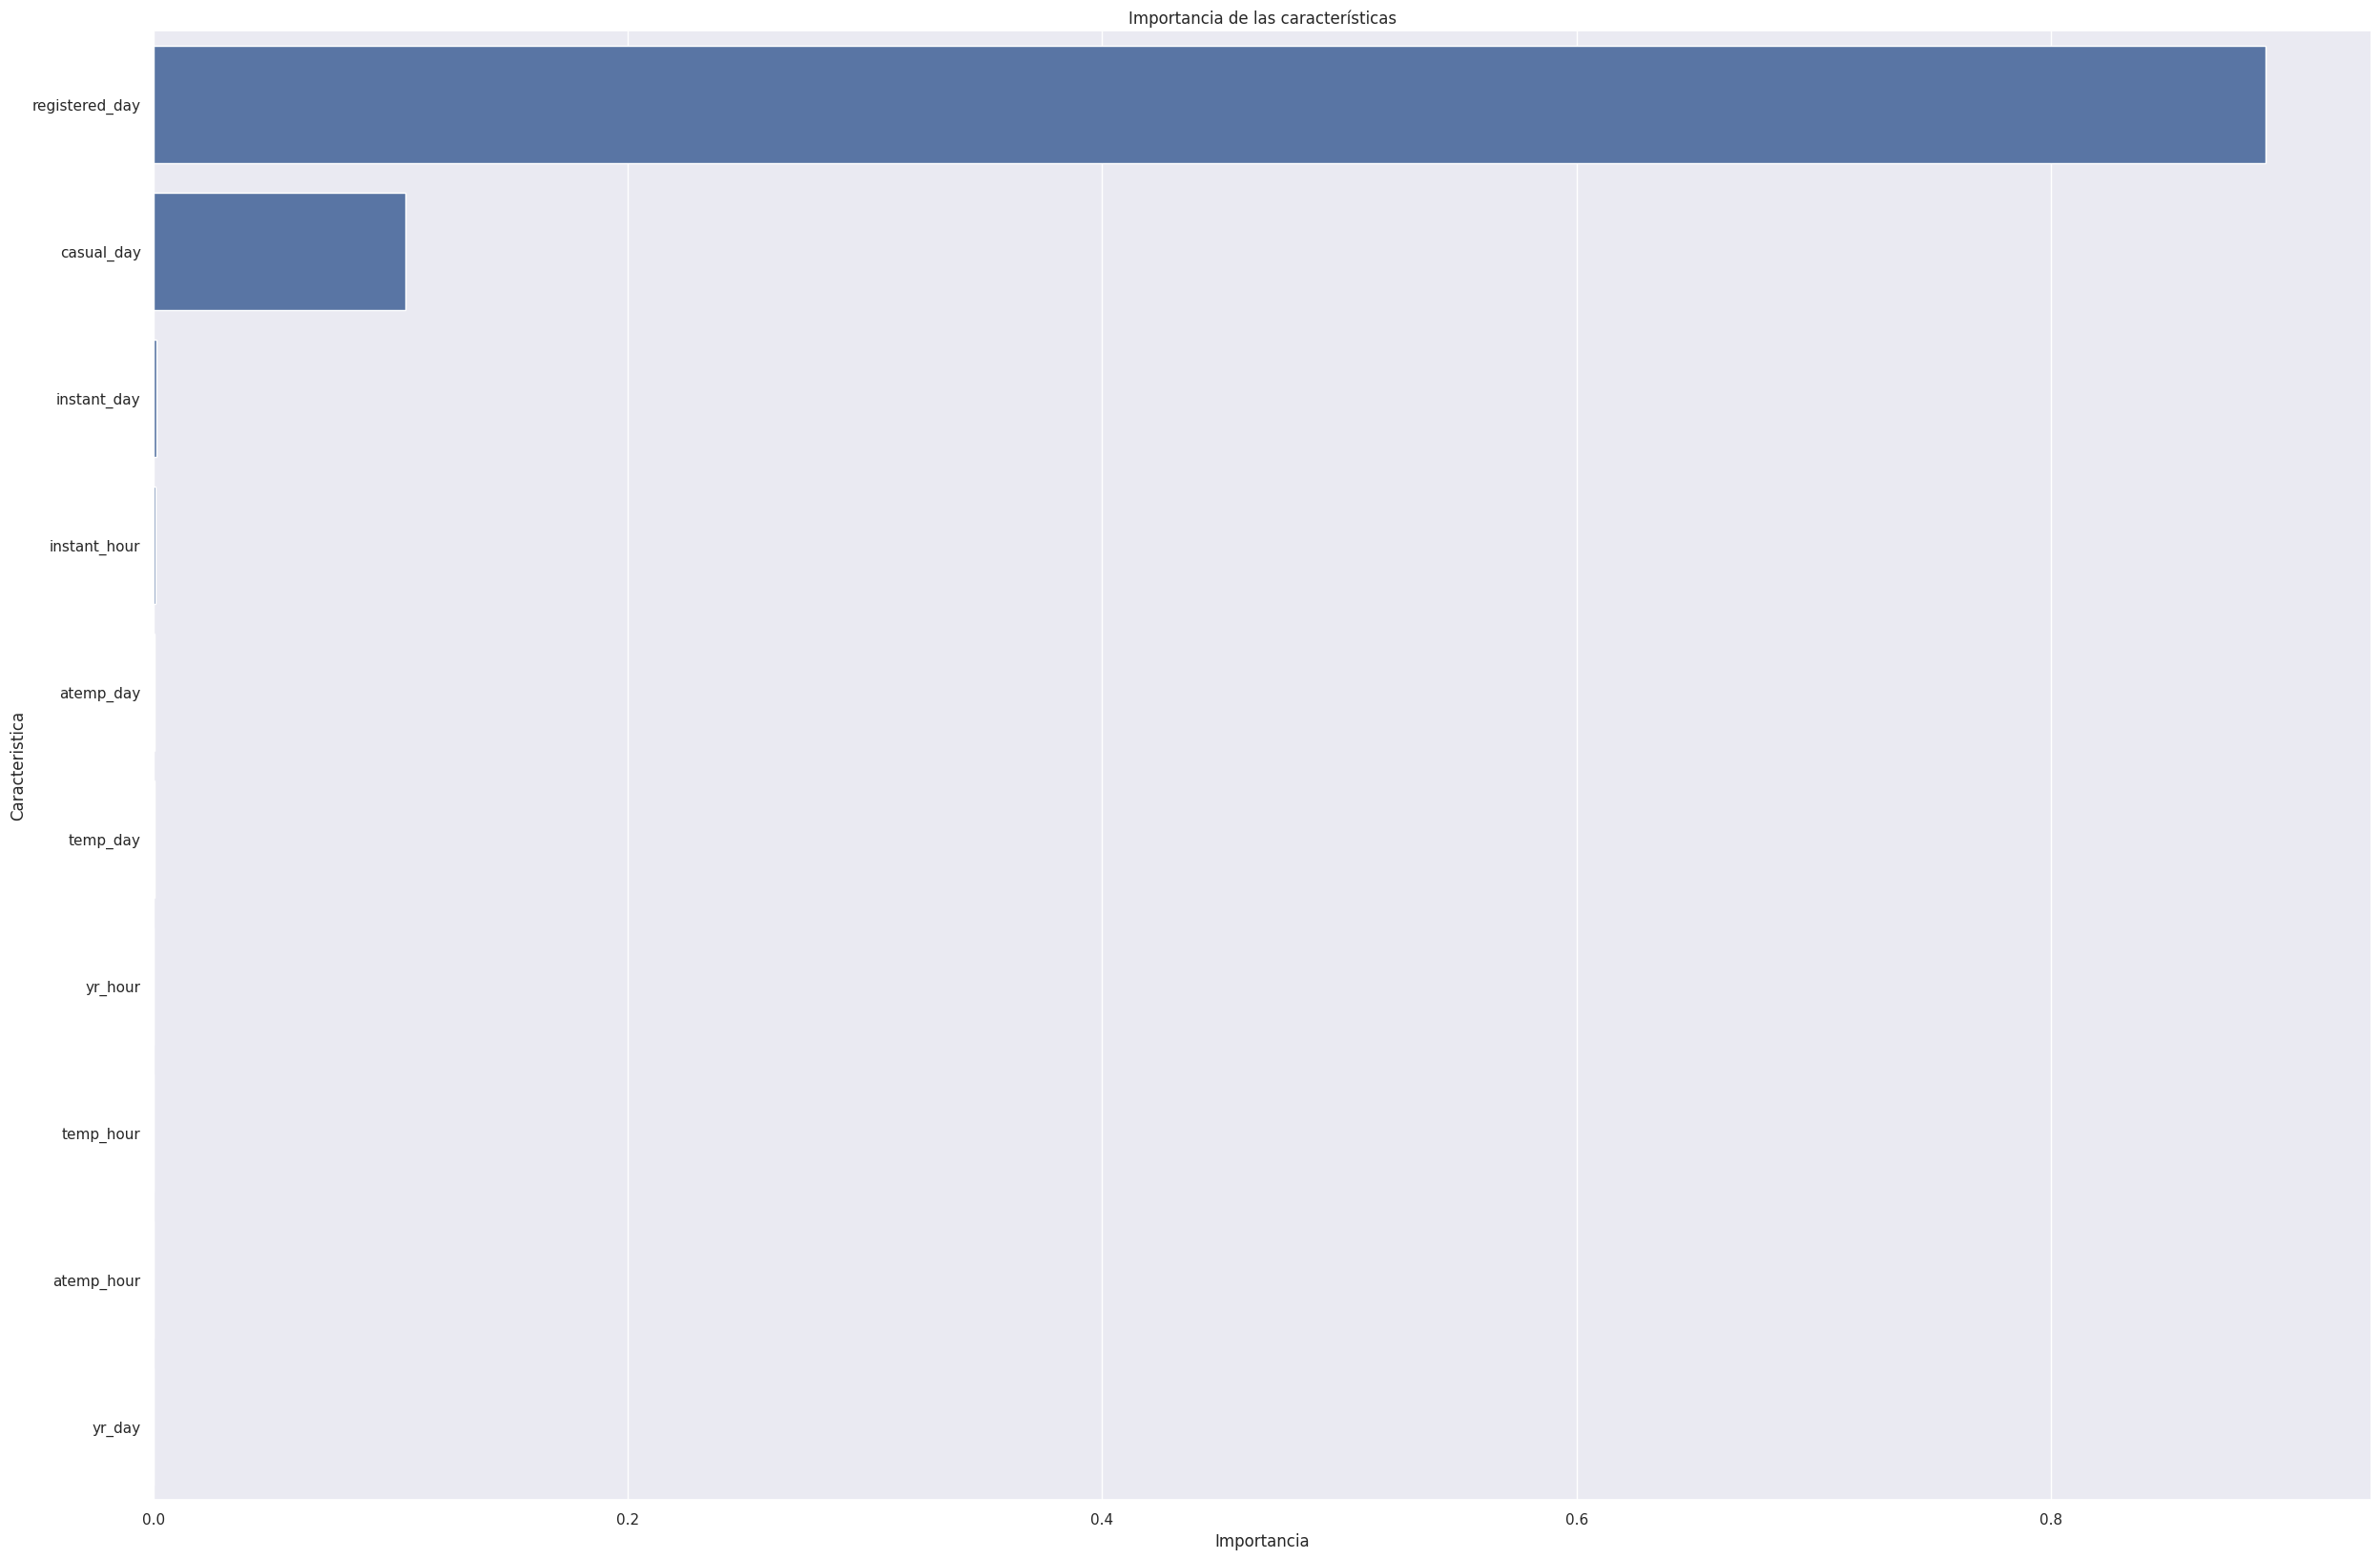

In [ ]:
importancias = modelo.feature_importances_
caracteristicas = x_entrenamiento.columns

df_importancias = pd.DataFrame({'Caracteristica': caracteristicas, 'Importancia': importancias})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

sns.barplot(x='Importancia', y='Caracteristica', data=df_importancias)
plt.title("Importancia de las características")
plt.show()

**_Optimización de hiperparámetros_**

Antes de realizar la optimización de los hiperparámetros, si nos fijamos en la importancia de las características hay bastantes que tienen una importancia de 0.00. Estas serán eliminadas en este apartado. Además en el gráfico de la distribución del error podemos ver que es banstante bueno ya que la mayoría se maneja alrededor del 0.

_Para continuar con la optimización se va a entrenar un modelo con la validación cruzada (por ejemplo n_splits = 4) y como lo ejecutaremos 3 veces, calcularemos la media de esas 5 ejecuciones._

**NOTA:** La validación cruzada ha sido modificada de 5 a 4 porque estaba tardando demasiado.

In [ ]:
drive.mount("/content/drive")

df_hour = pd.read_csv("/content/drive/My Drive/IABD/SAA/datasets/Tema 2/hour.csv")
df_day = pd.read_csv("/content/drive/My Drive/IABD/SAA/datasets/Tema 2/day.csv")
df_bike = df_hour.merge(df_day, on="dteday", suffixes=("_hour", "_day"))

df_norm = outliersCambiarMedia(df_bike)

scaler = preprocessing.MinMaxScaler()
df_norm[df_norm.drop("dteday", axis=1).columns] = scaler.fit_transform(df_norm.drop("dteday", axis=1))

x_df_bike = df_norm[["registered_day", "casual_day", "instant_day", "instant_hour"]]

y_df_bike = df_norm['cnt_day']

x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x_df_bike, y_df_bike, random_state=1, test_size=0.2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df_opt = pd.DataFrame(data={}, columns=["max_depth", "error_cuadratico_medio", "error_absoluto_medio"])

kf = KFold(n_splits=4, shuffle=True, random_state=1)

for i in range(10, 501, 10):
  modelo = RandomForestRegressor(n_estimators=i)
  puntuaciones_mae = cross_val_score(modelo, x_entrenamiento, y_entrenamiento, cv=kf, scoring=make_scorer(mean_absolute_error))
  puntuaciones_mse = cross_val_score(modelo, x_entrenamiento, y_entrenamiento, cv=kf, scoring=make_scorer(mean_squared_error))

  media_mae = np.mean(puntuaciones_mae)
  media_mse = np.mean(puntuaciones_mse)

  df_opt.loc[len(df_opt)] = [i, media_mse, media_mae]

df_opt

,max_depth,error_cuadratico_medio,error_absoluto_medio
0,10.0,2.165164e-07,0.000012
1,20.0,2.226446e-07,0.000012
2,30.0,1.810323e-07,0.000012
3,40.0,1.961204e-07,0.000012
4,50.0,1.829527e-07,0.000011
5,60.0,1.988391e-07,0.000012
6,70.0,1.868706e-07,0.000012
7,80.0,1.966082e-07,0.000011
8,90.0,1.868478e-07,0.000011
9,100.0,1.887657e-07,0.000012


Me sorprende el valor grátamente del error medio absoluto medio. El modelo tiene 0.000011 desde el n_estimators 50, por lo tanto, estos serán los hiperparámetros porque si nos fijamos en el error absoluto medio en la mayoría es de 0.000012.

_Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostramos los resultados._

In [47]:
modelo = RandomForestRegressor(n_estimators=50, random_state=1)
modelo.fit(x_entrenamiento, y_entrenamiento)

y_prediccion = modelo.predict(x_test)


print("El error cuadrático medio:", mean_squared_error(y_test, y_prediccion))
print("El error absoluto medio:", mean_absolute_error(y_test, y_prediccion))

El error cuadrático medio: 3.0466492751200365e-09
El error absoluto medio: 2.7616892538512e-06
